In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import 

In [2]:
url = 'Clean_Alimconfonfiance.csv'
data = pd.read_csv(url, encoding = "utf-8",sep=';',dtype=object)

In [3]:
data.head()

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03 01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26 01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22 01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19 01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14 02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Synthese_eval_sanit
- **lignes et colonnes** : (35558, 12)
- **types de variables** : qualitatives : 12, quantitatives : 0
- **Analyse des valeurs manquantes** :
   filtre 27.l5% Agrement  72.02%

#### Analyse de Fond :
- **Visualisation de la target** :
-**Satisfaisant**                     0.526239.  
-**Très satisfaisant**                0.422268.  
-**A améliorer**                      0.048203.  
-**A corriger de manière urgente**    0.003290.  
    
    
    
- **Signification des variables** :
    -  APP_Libelle_etablissement: Nom de l'Établissment              
    -  SIRET                    : Numero d'identification             
    -  Adresse_2_UA             : Adresse de l'établissment             
    -  Code_postal              : Code postal             
    -  Libelle_commune          : Nome de la commune de l'établissment            
    -  Numero_inspection        : Numero de l'inspection             
    -  Date_inspection          : Date de l'inpection             
    -  APP_Libelle_activite_etablissement : Intitulé de l'activité de l'établissement   
    -  Synthese_eval_sanit      : Résultat de l'inspection             
    -  Agrement                 : Numero d'agrement pour les entreprises agrée             
    -  geores                   : geo-localisation             
    -  filtre                   : Autre indicateur de l'activité de l'établissment             
    -  ods_type_activite        : Secteur d'activité de l'établissement agro-alimentaire



- **Relation Variables / Target** :
Sans transformation mis a part l'encodage des données l'analyse du Dataframe ne nous a pas permis de relevé de correlation explicite
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :


- **NaN analyse** : 

### hypotheses nulle (H0): 



    

### Analyse de la forme des données

In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35457 entries, 0 to 35456
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          35457 non-null  object
 1   APP_Libelle_etablissement           35457 non-null  object
 2   SIRET                               35457 non-null  object
 3   Adresse_2_UA                        35026 non-null  object
 4   Code_postal                         35447 non-null  object
 5   Libelle_commune                     35457 non-null  object
 6   Numero_inspection                   35457 non-null  object
 7   Date_inspection                     35457 non-null  object
 8   APP_Libelle_activite_etablissement  35457 non-null  object
 9   Synthese_eval_sanit                 35457 non-null  object
 10  Agrement                            9938 non-null   object
 11  geores                              34868 non-null  ob

In [5]:
df.describe()


,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
count,35457,35457,35457,35026,35447,35457,35457,35457,35457,35457,9938,34868,25683,35457
unique,35457,27436,30917,28947,5122,9373,35457,298,157,4,7815,29115,103,7
top,0,ECOLE PRIMAIRE PUBLIQUE,21130055300016,LE BOURG,75015,Paris 15e Arrondissement,15914760,2021-11-23 01:00:00+01:00,Restaurant,Satisfaisant,29233001,"48.859,2.347",Restaurant,Autres
freq,1,228,11,101,567,555,1,297,10296,18654,10,47,10296,26392


In [6]:
df['ods_type_activite'].value_counts(normalize=True)

Autres                                              0.744338
Viandes et produits carnés                          0.078236
Produits de la mer et d'eau douce                   0.052627
Lait et produits laitiers                           0.050681
Abattoirs                                           0.034380
Transport et entreposage de denrées alimentaires    0.025947
Œufs et ovoproduits                                 0.013791
Name: ods_type_activite, dtype: float64

In [7]:
df.shape

(35457, 14)

<AxesSubplot:ylabel='None'>

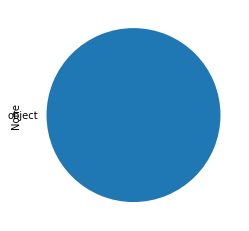

In [8]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

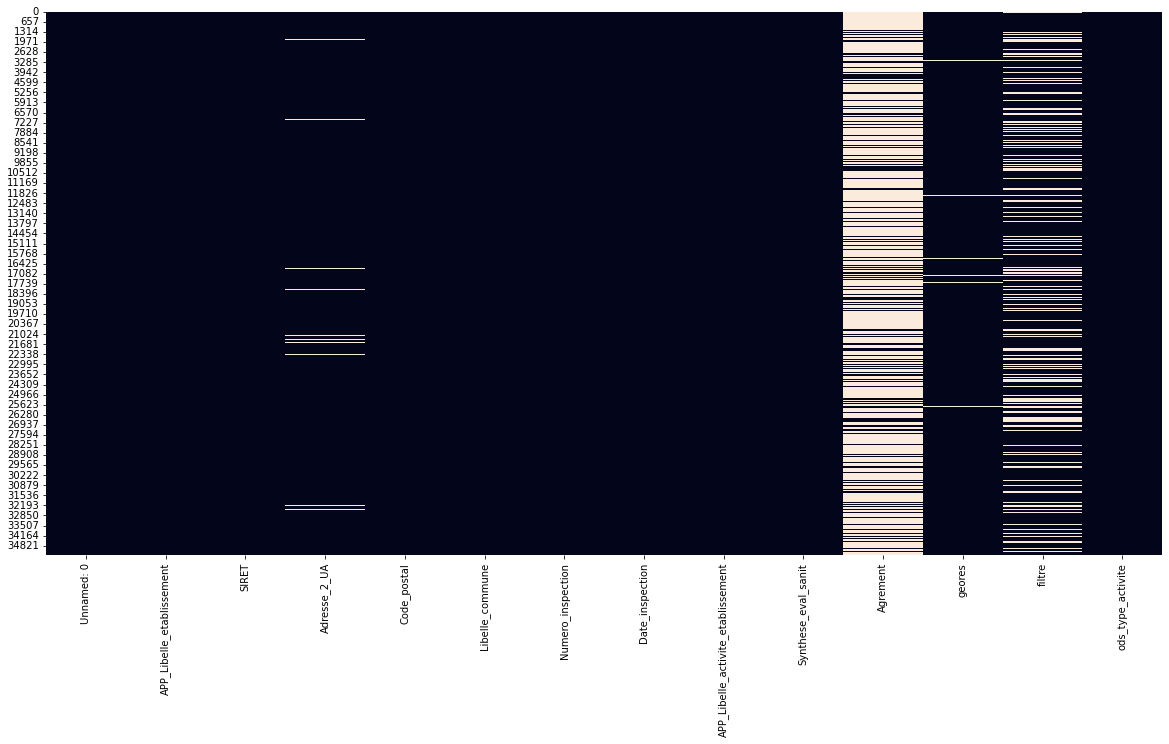

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Unnamed: 0                            0.000000
APP_Libelle_etablissement             0.000000
SIRET                                 0.000000
Libelle_commune                       0.000000
Numero_inspection                     0.000000
Date_inspection                       0.000000
APP_Libelle_activite_etablissement    0.000000
Synthese_eval_sanit                   0.000000
ods_type_activite                     0.000000
Code_postal                           0.000282
Adresse_2_UA                          0.012156
geores                                0.016612
filtre                                0.275658
Agrement                              0.719717
dtype: float64

In [11]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526102
Très satisfaisant                0.422512
A améliorer                      0.048199
A corriger de manière urgente    0.003187
Name: Synthese_eval_sanit, dtype: float64

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [12]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03 01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26 01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22 01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19 01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14 02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


<AxesSubplot:>

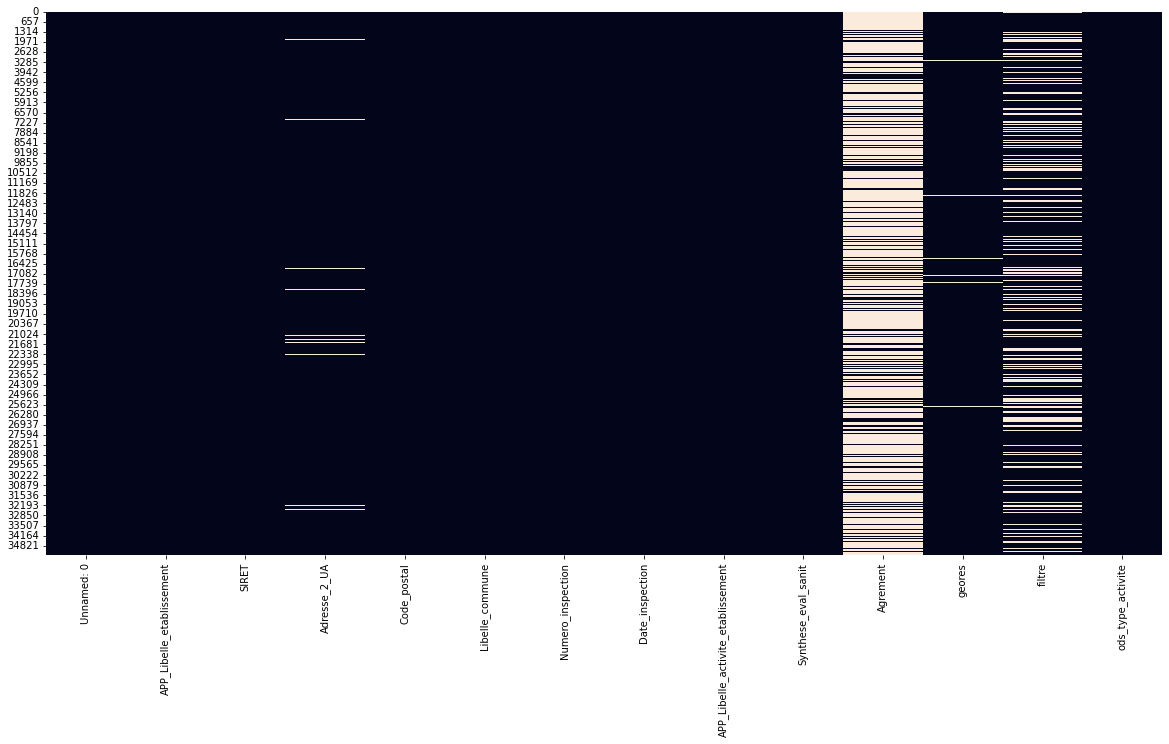

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### La colonne filtre :

La colonne filtre peut être reduite a l'app libelle activite car lorsque le champ n'est pas vide sa valeur est égale a celle de la colonne libelle activité

In [14]:
df = df.drop('filtre', axis=1)
#df[df['filtre']!=df["APP_Libelle_activite_etablissement"]]

In [15]:
df.head()

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
0,0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03 01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Autres
1,1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26 01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Autres
2,2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22 01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Autres
3,3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19 01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",Autres
4,4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14 02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Autres


### Examen de la colonne target

In [16]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526102
Très satisfaisant                0.422512
A améliorer                      0.048199
A corriger de manière urgente    0.003187
Name: Synthese_eval_sanit, dtype: float64

On peut voir que les categories "Tres satisfaisant" et "Satisfaisant" represente environ 94% de nos valeurs


In [17]:
df[df["Synthese_eval_sanit"]=='A corriger de manière urgente'].describe()

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
count,113,113,113,112,113,113,113,113,113,113,14,113,113
unique,113,110,110,109,95,95,113,84,16,1,14,109,7
top,705,ZIMPFER JULIEN,45382473200029,FERME DU LANDGRABEN,67240,Bischwiller,16181670,2021-04-15 02:00:00+02:00,Restaurant,A corriger de manière urgente,68062001,"48.744134,7.886703",Autres
freq,1,4,4,4,4,4,1,4,54,113,1,4,96


Ici que la categorie la moins representée "A corriger de manière urgente" represantant 0,3% de notre dataframe nous indique que le datasets n'est pas proportionné et que nous ne disposons que de tres peu d'exemple pour les deux categories qui ont le plus d'interet dans notre contexte

In [18]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10]

Découpe de gros gibier d'élevage                                                                                                          9
Fromagerie|Libre service|Alimentation générale                                                                                            9
Alimentation générale|Traiteur                                                                                                            9
Production de collagène, de gélatine ou de PHR                                                                                            8
Fromagerie|Libre service|Alimentation générale|Boucherie-Charcuterie                                                                      8
                                                                                                                                         ..
Libre service|Rayon poissonnerie|Rayon fromagerie|Alimentation générale|Rayon pain/viennoiserie/pâtisserie|Rayon boucherie-charcuterie    1
Libre service|Alimen

In [19]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].sum()

271

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

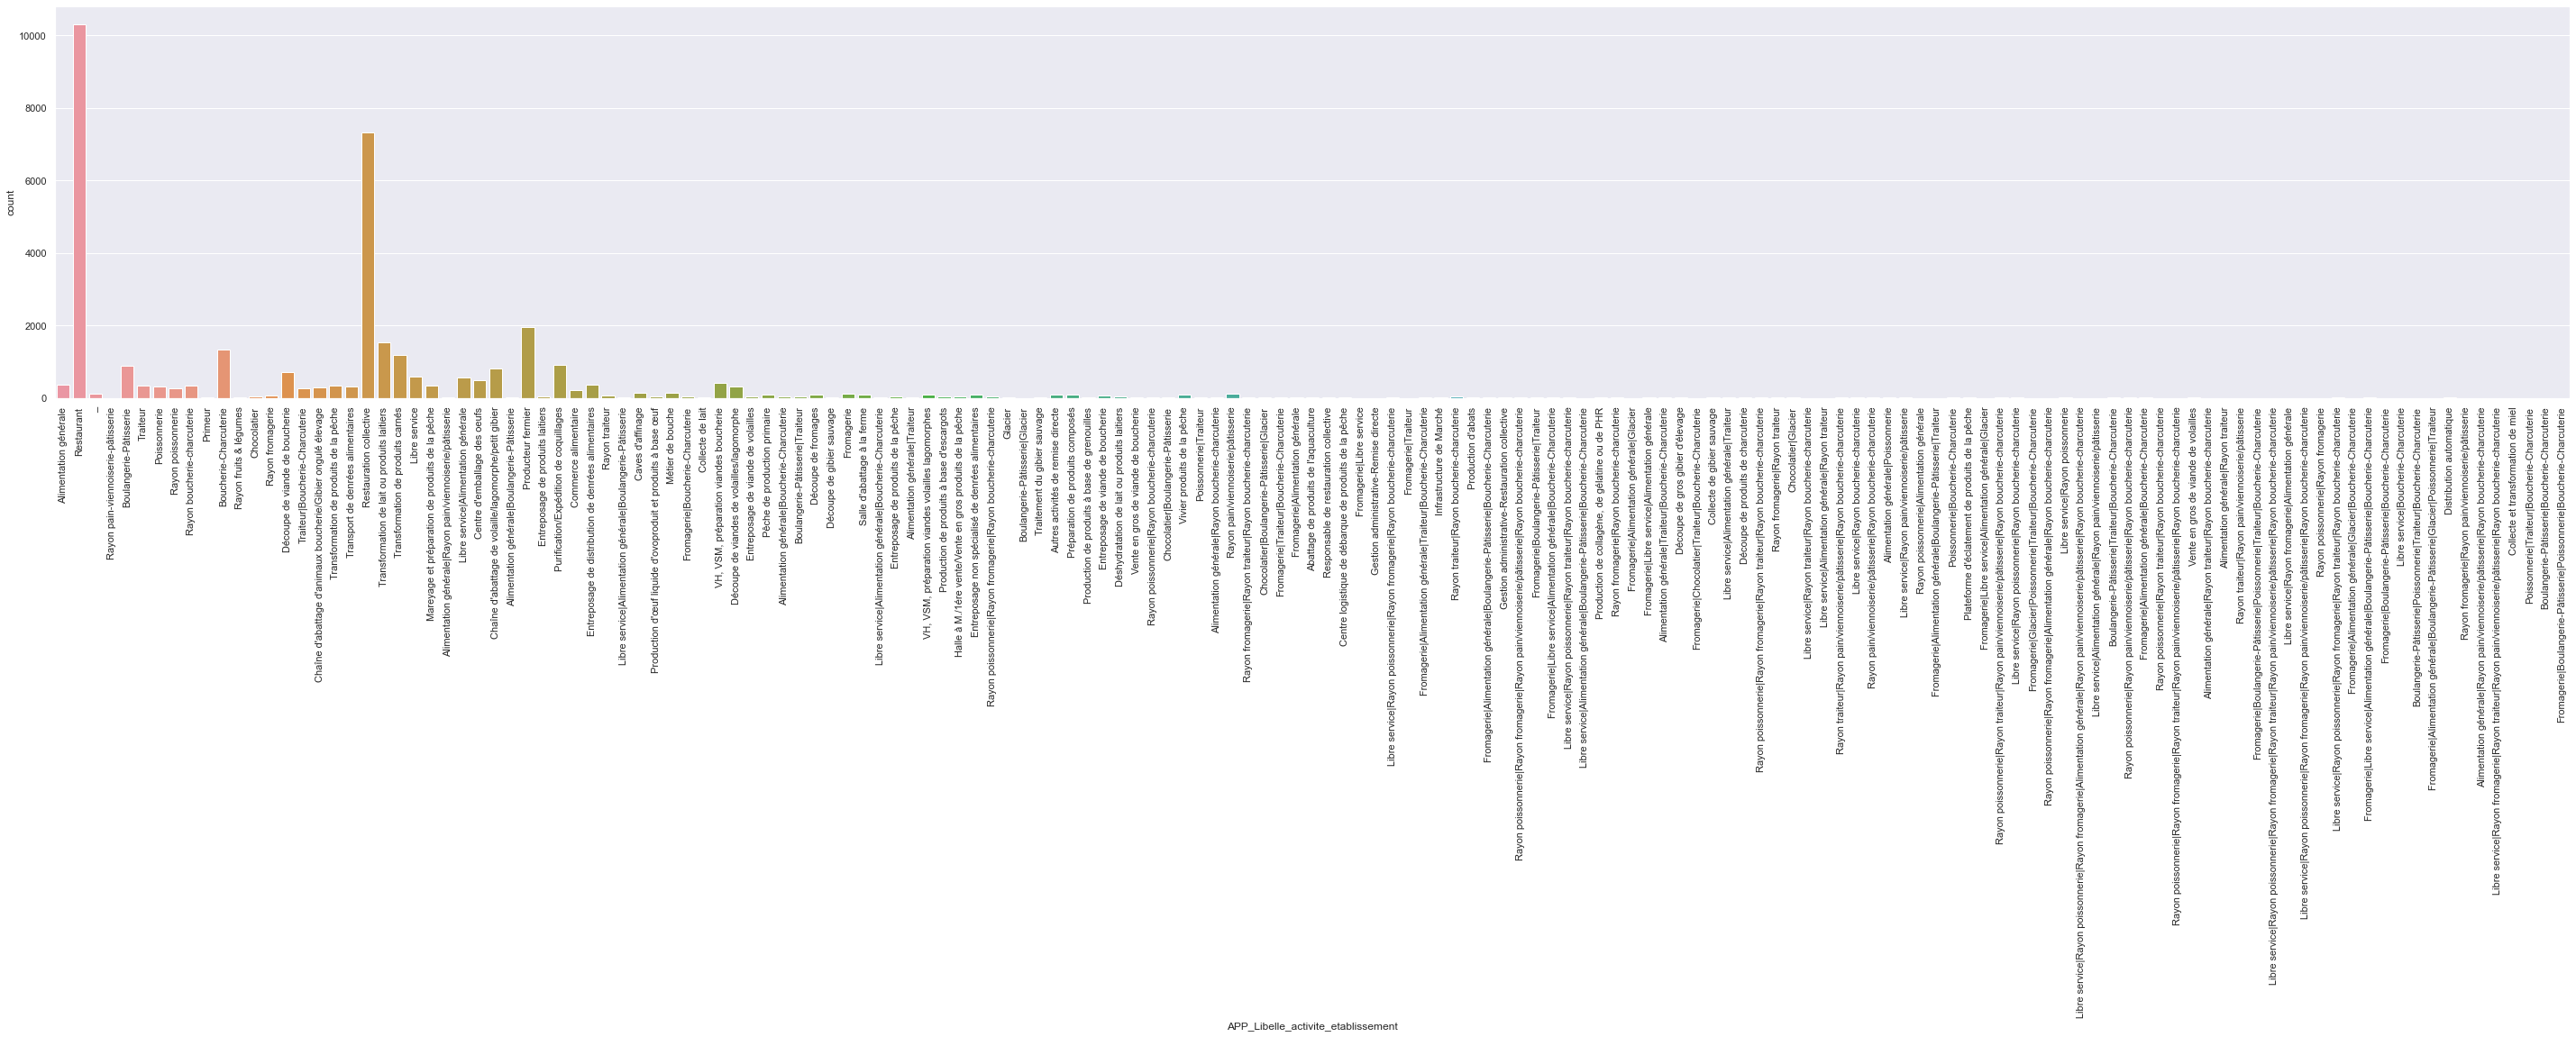

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement")

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

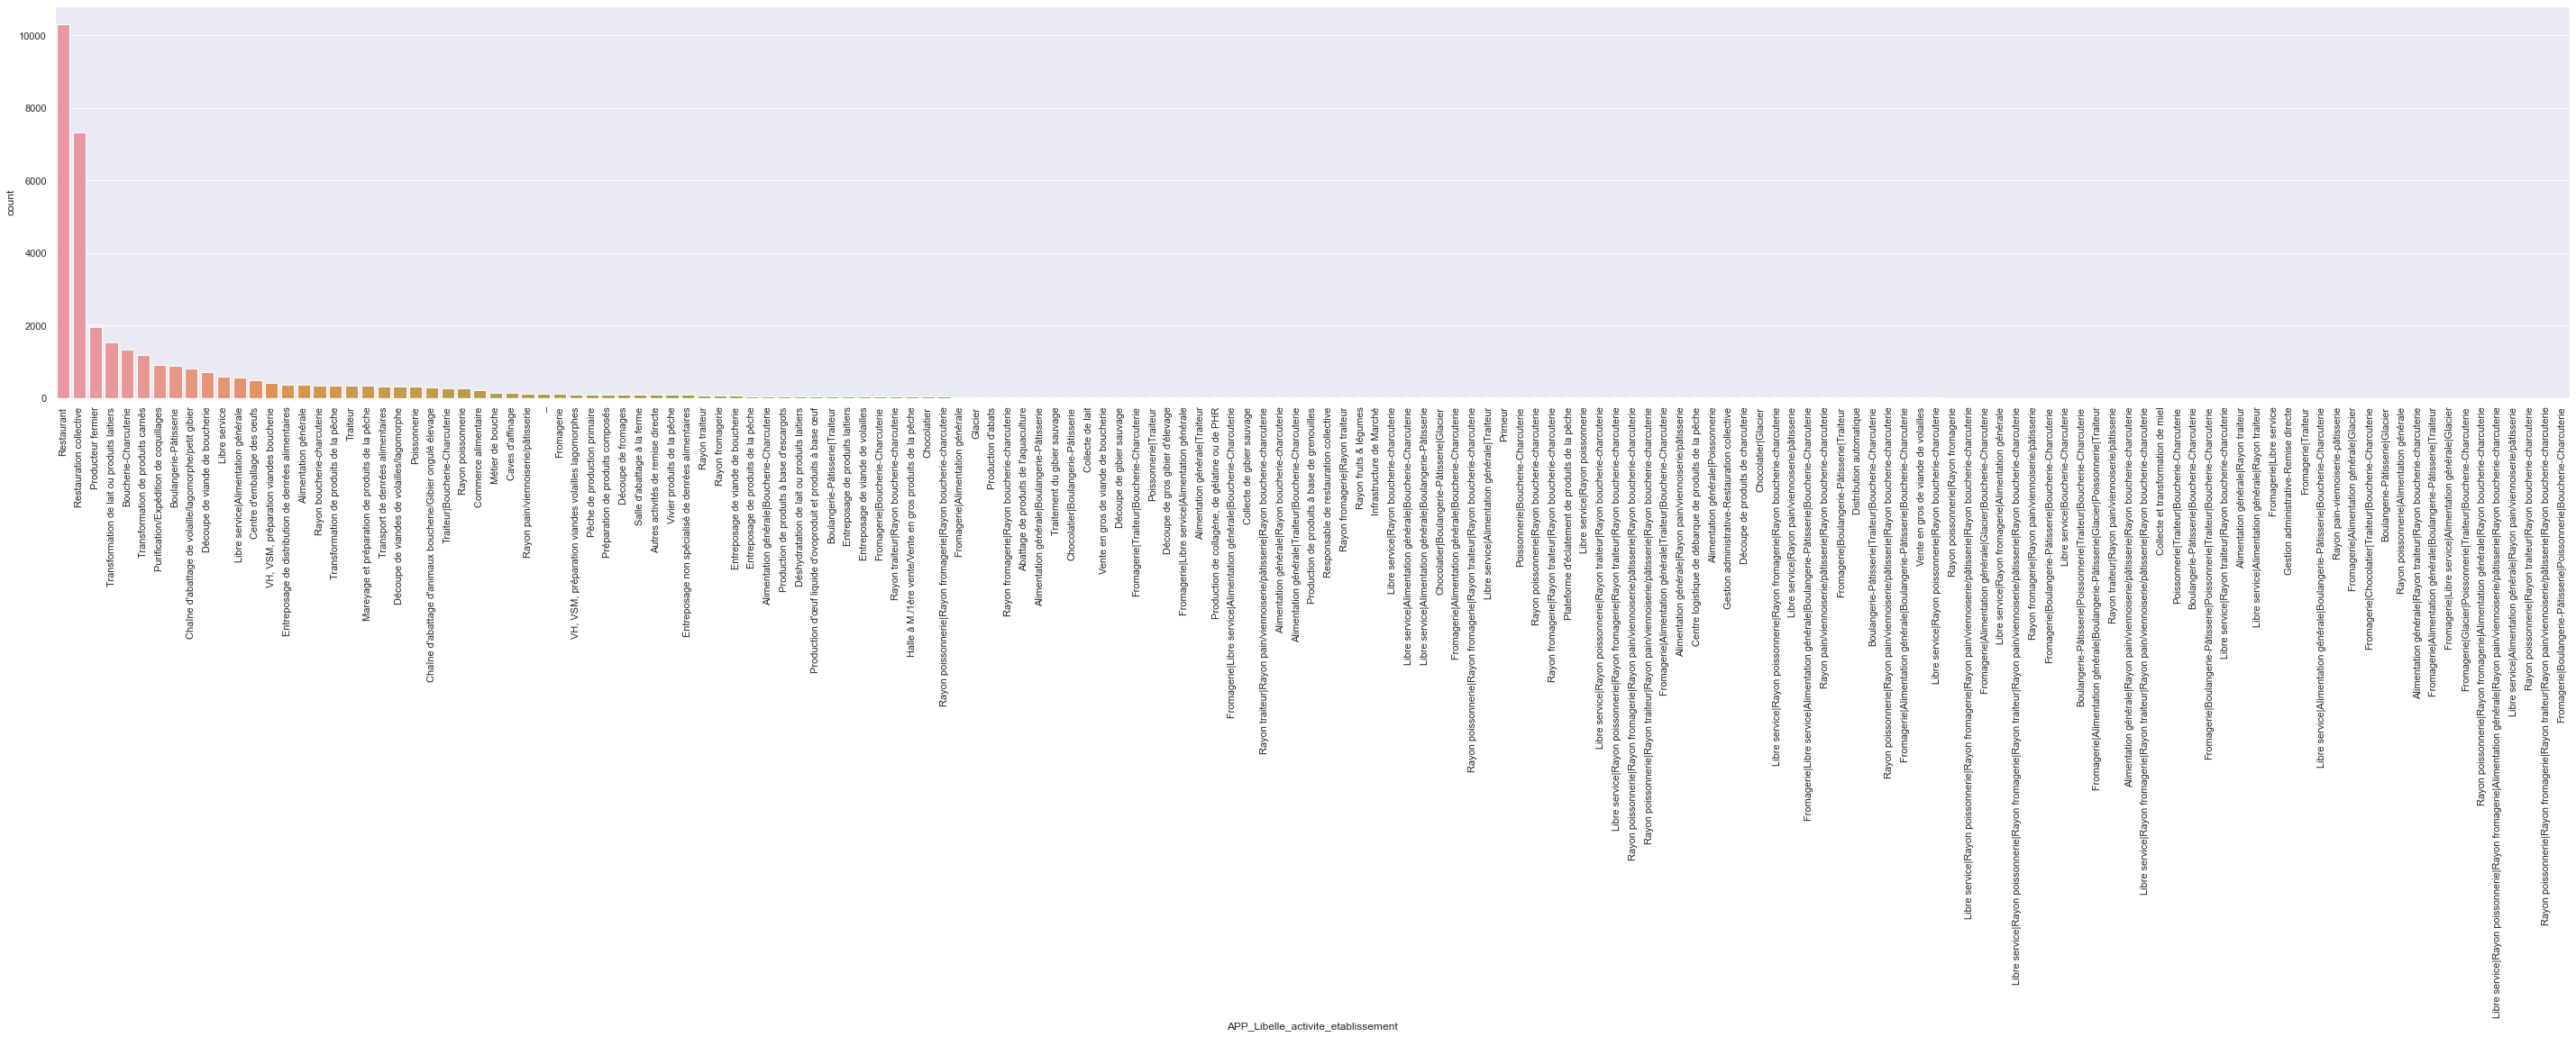

In [21]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement", order=df['APP_Libelle_activite_etablissement'].value_counts().index)

In [22]:
list_of_activite = list(df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].index)

In [23]:
df_activite = df[df['APP_Libelle_activite_etablissement'].isin(list_of_activite)]
df_activite

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
6,6,LECLERC (PLOUDAL DISTRIBUTION),30959801900052,KERUSCAT,29830,PLOUDALMEZEAU,16265073,2021-12-06 01:00:00+01:00,Rayon pain-viennoiserie-pâtisserie,Très satisfaisant,NaN,"48.540309,-4.66693",Autres
45,45,MANGEONS FRAIS (LES HALLES BLACHERE BERNARD),34029254901225,7 BD DU HUIT MAI,71210,TORCY,15972755,2021-04-15 02:00:00+02:00,Primeur,Très satisfaisant,NaN,"46.781683,4.438622",Autres
51,51,LIDL,34326262221475,RUE D AUSTRALIE,80000,AMIENS,15930027,2021-03-15 01:00:00+01:00,Rayon fruits & légumes,Très satisfaisant,NaN,"49.903936,2.275338",Autres
128,128,PETIT CASINO (DISTRIBUTION CASINO FRANCE),42826802333888,14 PL CARNOT,69400,VILLEFRANCHE SUR SAONE,15898453,2021-02-17 01:00:00+01:00,Rayon fruits & légumes,Satisfaisant,NaN,"45.98563,4.717885",Autres
238,238,MONSIEUR TY LAM,47801174500013,3 AV JOFFRE,92380,GARCHES,16221738,2021-10-28 02:00:00+02:00,Primeur,Satisfaisant,NaN,"48.838817,2.186315",Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,34869,PETIT CASINO,81256581000015,4 ROUTE NEUVE,48320,Ispagnac,21-048219-1,2021-06-18 02:00:00+02:00,Libre service|Alimentation générale|Boulangeri...,Satisfaisant,NaN,"44.371029,3.534767",Autres
34883,34982,MA FERME EN VILLE,80126411000033,112 RUE DE SEZE,69006,Lyon 6e Arrondissement,21-063921-1,2021-08-11 02:00:00+02:00,Fromagerie|Libre service|Alimentation générale...,Satisfaisant,NaN,"45.768893,4.854972",Autres
34924,35023,EURL ANDRE PASCAL,49216897600016,"10, RUE DU PORTAIL",41300,Orçay,21-072947-1,2021-09-14 02:00:00+02:00,Collecte de gibier sauvage,Très satisfaisant,NaN,"47.288818,2.111666",Abattoirs
35233,35333,PEYNE,89332379000012,6 PL SAINT BLAISE,23250,Pontarion,21-015998-1,2021-06-15 02:00:00+02:00,Fromagerie|Libre service|Alimentation générale...,Très satisfaisant,NaN,"45.997246,1.850505",Autres


In [24]:
df_sample = df_activite.sample(10)
df_sample

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
12672,12697,AUX DOUCEURS DU LAC,88153525600013,14 RUE DES CASINOS,61140,Bagnoles de l'Orne Normandie,21-076164-1,2021-09-22 02:00:00+02:00,Chocolatier|Boulangerie-Pâtisserie|Glacier,Satisfaisant,NaN,"48.557246,-0.414192",Autres
13886,13917,CARREFOUR MARKET,83358761100017,ROUTE DE SAMADET,40700,Hagetmau,21-061233-1,2021-08-02 02:00:00+02:00,Libre service|Rayon poissonnerie|Rayon fromage...,Satisfaisant,NaN,"43.655952,-0.572243",Autres
34291,34389,SUPERMARCHES MATCH,78548035102719,RUE DU 11 NOVEMBRE,62000,Arras,21-038026-1,2021-05-11 02:00:00+02:00,Rayon poissonnerie|Rayon fromagerie|Rayon pain...,A améliorer,NaN,"50.278785,2.787378",Autres
31810,31901,GM FRAICHEUR,89929294000017,29 RUE ZIZIM,23400,Bourganeuf,21-101923-1,2021-12-09 01:00:00+01:00,Fromagerie|Libre service|Alimentation générale...,Satisfaisant,NaN,"45.953563,1.755652",Autres
51,51,LIDL,34326262221475,RUE D AUSTRALIE,80000,AMIENS,15930027,2021-03-15 01:00:00+01:00,Rayon fruits & légumes,Très satisfaisant,NaN,"49.903936,2.275338",Autres
20849,20897,COCCIMARKET,83522991500011,1 RUE DES SAULAIES,49080,Bouchemaine,21-028251-1,2021-04-06 02:00:00+02:00,Fromagerie|Alimentation générale|Boucherie-Cha...,Satisfaisant,NaN,"47.422037,-0.610707",Autres
17483,17521,HARIDIS,38026603100018,2 AVENUE DE SABRES,40000,Mont-de-Marsan,21-057292-1,2021-07-19 02:00:00+02:00,Rayon pain/viennoiserie/pâtisserie|Rayon bouch...,Satisfaisant,NaN,"43.897058,-0.513143",Autres
31771,31862,EUROMIEL,77563811700033,DOMAINE SAINT GEORGES BP 27,64290,Gan,21-054119-1,2021-06-16 02:00:00+02:00,Collecte et transformation de miel,Satisfaisant,NaN,"43.222352,-0.393064",Autres
14952,14985,RECORD,78692030600622,15 AVENUE MARCHANDE,57520,Grosbliederstroff,21-087036-1,2021-10-20 02:00:00+02:00,Libre service|Rayon poissonnerie,Très satisfaisant,NaN,"49.13471,7.043764",Autres
33046,33138,LE PEPPINO,49765692600019,"28, Route Nationale",72230,Guécélard,21-022015-1,2021-03-10 01:00:00+01:00,Distribution automatique,Satisfaisant,NaN,"47.878376,0.130214",Autres


In [25]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 12672 to 33046
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          10 non-null     object
 1   APP_Libelle_etablissement           10 non-null     object
 2   SIRET                               10 non-null     object
 3   Adresse_2_UA                        10 non-null     object
 4   Code_postal                         10 non-null     object
 5   Libelle_commune                     10 non-null     object
 6   Numero_inspection                   10 non-null     object
 7   Date_inspection                     10 non-null     object
 8   APP_Libelle_activite_etablissement  10 non-null     object
 9   Synthese_eval_sanit                 10 non-null     object
 10  Agrement                            0 non-null      object
 11  geores                              10 non-null     o

In [26]:
def explode_dataframe(df, column):
    df[column] = df[column].astype(str).str.split('|')
    df = df.explode(column)
    return df

df_sample = explode_dataframe(df_sample, 'APP_Libelle_activite_etablissement')
df_sample


,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
12672,12697,AUX DOUCEURS DU LAC,88153525600013,14 RUE DES CASINOS,61140,Bagnoles de l'Orne Normandie,21-076164-1,2021-09-22 02:00:00+02:00,Chocolatier,Satisfaisant,NaN,"48.557246,-0.414192",Autres
12672,12697,AUX DOUCEURS DU LAC,88153525600013,14 RUE DES CASINOS,61140,Bagnoles de l'Orne Normandie,21-076164-1,2021-09-22 02:00:00+02:00,Boulangerie-Pâtisserie,Satisfaisant,NaN,"48.557246,-0.414192",Autres
12672,12697,AUX DOUCEURS DU LAC,88153525600013,14 RUE DES CASINOS,61140,Bagnoles de l'Orne Normandie,21-076164-1,2021-09-22 02:00:00+02:00,Glacier,Satisfaisant,NaN,"48.557246,-0.414192",Autres
13886,13917,CARREFOUR MARKET,83358761100017,ROUTE DE SAMADET,40700,Hagetmau,21-061233-1,2021-08-02 02:00:00+02:00,Libre service,Satisfaisant,NaN,"43.655952,-0.572243",Autres
13886,13917,CARREFOUR MARKET,83358761100017,ROUTE DE SAMADET,40700,Hagetmau,21-061233-1,2021-08-02 02:00:00+02:00,Rayon poissonnerie,Satisfaisant,NaN,"43.655952,-0.572243",Autres
13886,13917,CARREFOUR MARKET,83358761100017,ROUTE DE SAMADET,40700,Hagetmau,21-061233-1,2021-08-02 02:00:00+02:00,Rayon fromagerie,Satisfaisant,NaN,"43.655952,-0.572243",Autres
13886,13917,CARREFOUR MARKET,83358761100017,ROUTE DE SAMADET,40700,Hagetmau,21-061233-1,2021-08-02 02:00:00+02:00,Rayon boucherie-charcuterie,Satisfaisant,NaN,"43.655952,-0.572243",Autres
34291,34389,SUPERMARCHES MATCH,78548035102719,RUE DU 11 NOVEMBRE,62000,Arras,21-038026-1,2021-05-11 02:00:00+02:00,Rayon poissonnerie,A améliorer,NaN,"50.278785,2.787378",Autres
34291,34389,SUPERMARCHES MATCH,78548035102719,RUE DU 11 NOVEMBRE,62000,Arras,21-038026-1,2021-05-11 02:00:00+02:00,Rayon fromagerie,A améliorer,NaN,"50.278785,2.787378",Autres
34291,34389,SUPERMARCHES MATCH,78548035102719,RUE DU 11 NOVEMBRE,62000,Arras,21-038026-1,2021-05-11 02:00:00+02:00,Rayon pain/viennoiserie/pâtisserie,A améliorer,NaN,"50.278785,2.787378",Autres


In [27]:
df_explode = explode_dataframe(df, 'APP_Libelle_activite_etablissement')
df_explode

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
0,0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03 01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Autres
1,1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26 01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Autres
2,2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22 01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Autres
3,3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19 01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",Autres
4,4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14 02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35452,35553,MAIRIE COMMUNE DU LANDREAU,21440079800069,Chemin des Roses,44430,Le Landreau,21-048337-1,2021-06-11 02:00:00+02:00,Restauration collective,Satisfaisant,44079001,"47.203711,-1.307116",Autres
35453,35554,CAT LE CHENE,77570767200033,29 RUE GUSTAVE EIFFEL,78120,Rambouillet,21-080904-1,2021-10-07 02:00:00+02:00,Restauration collective,Satisfaisant,78517061,"48.625631,1.823219",Autres
35454,35555,SARL SHAO,44299272300019,AV FRANÇOIS MITTERAND,71200,Le Creusot,21-060380-1,2021-07-23 02:00:00+02:00,Restaurant,Satisfaisant,NaN,"46.806651,4.430531",Autres
35455,35556,COLLEGE LEON BLUM,19780260600024,Chemin Départemental 98,78450,Villepreux,21-040496-1,2021-06-02 02:00:00+02:00,Restauration collective,Satisfaisant,NaN,"48.820455,2.012352",Autres


<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

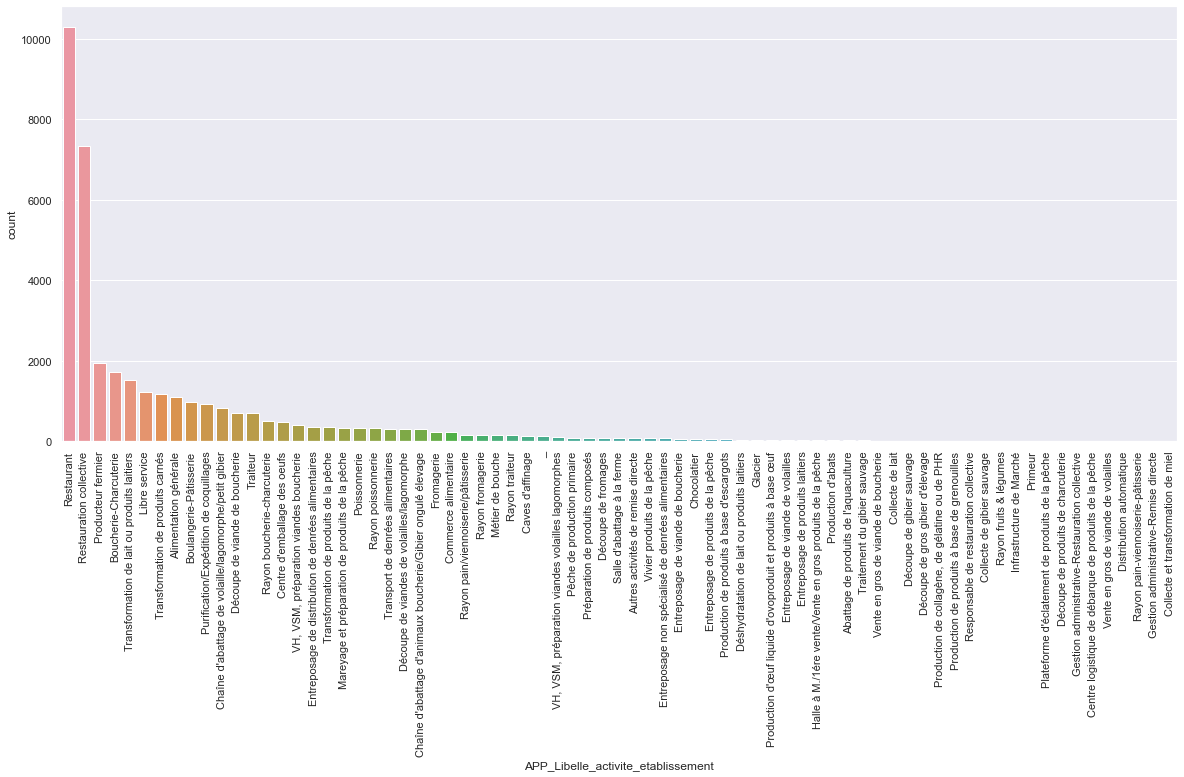

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df_explode,x="APP_Libelle_activite_etablissement", order = df_explode['APP_Libelle_activite_etablissement'].value_counts().index)

In [29]:
df_explode['APP_Libelle_activite_etablissement'].value_counts()[df_explode['APP_Libelle_activite_etablissement'].value_counts()<= 10].sum()

76

### Variables Qualitatives

<AxesSubplot:xlabel='Synthese_eval_sanit', ylabel='count'>

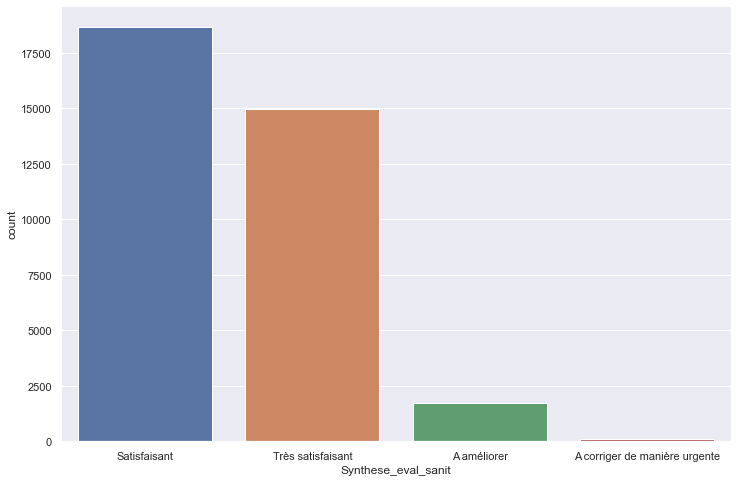

In [30]:
"""for col in df[["APP_Libelle_activite_etablissement","Synthese_eval_sanit"]]:
    plt.figure()
    df[col].value_counts().plot.pie()"""
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Synthese_eval_sanit")

In [31]:
s = df_explode.groupby('Synthese_eval_sanit')['APP_Libelle_activite_etablissement'].value_counts(normalize=True)
s

Synthese_eval_sanit  APP_Libelle_activite_etablissement                   
A améliorer          Restaurant                                               0.328667
                     Restauration collective                                  0.125420
                     Boucherie-Charcuterie                                    0.086786
                     Boulangerie-Pâtisserie                                   0.076148
                     Alimentation générale                                    0.041993
                                                                                ...   
Très satisfaisant    Centre logistique de débarque de produits de la pêche    0.000065
                     Distribution automatique                                 0.000065
                     Gestion administrative-Remise directe                    0.000065
                     Infrastructure de Marché                                 0.000065
                     Rayon pain-viennoiserie-pâtisserie

In [32]:
# s = s.groupby('Synthese_eval_sanit')
# s

In [33]:
ameliorer=s.groupby('Synthese_eval_sanit').get_group("A améliorer")
ameliorer

Synthese_eval_sanit  APP_Libelle_activite_etablissement                          
A améliorer          Restaurant                                                      0.328667
                     Restauration collective                                         0.125420
                     Boucherie-Charcuterie                                           0.086786
                     Boulangerie-Pâtisserie                                          0.076148
                     Alimentation générale                                           0.041993
                     Transformation de produits carnés                               0.027996
                     Producteur fermier                                              0.027436
                     Traiteur                                                        0.025756
                     Libre service                                                   0.023516
                     Chaîne d'abattage de volaille/lagomorphe/petit gibi

In [34]:
s_to_df = s.reset_index(name='counts')
s_to_df

,Synthese_eval_sanit,APP_Libelle_activite_etablissement,counts
0,A améliorer,Restaurant,0.328667
1,A améliorer,Restauration collective,0.125420
2,A améliorer,Boucherie-Charcuterie,0.086786
3,A améliorer,Boulangerie-Pâtisserie,0.076148
4,A améliorer,Alimentation générale,0.041993
...,...,...,...
205,Très satisfaisant,Centre logistique de débarque de produits de l...,0.000065
206,Très satisfaisant,Distribution automatique,0.000065
207,Très satisfaisant,Gestion administrative-Remise directe,0.000065
208,Très satisfaisant,Infrastructure de Marché,0.000065


<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='counts'>

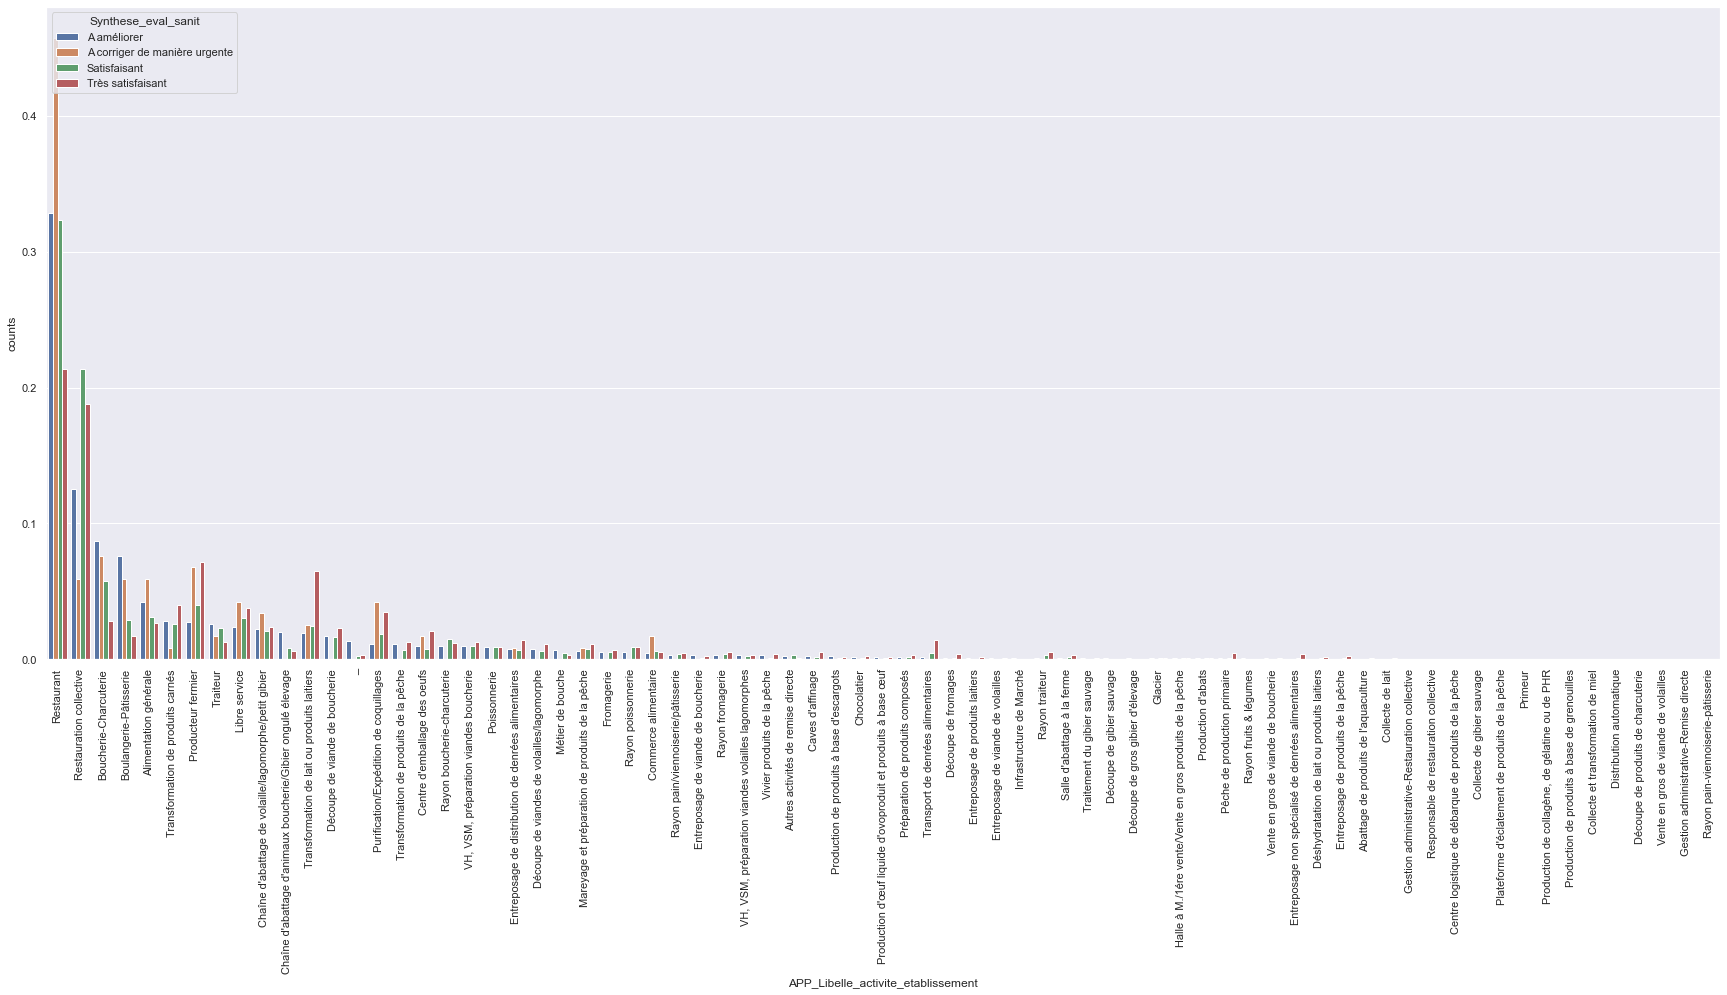

In [35]:
plt.figure(figsize=(30,12))
plt.xticks(rotation='vertical')
sns.barplot(data=s_to_df, x="APP_Libelle_activite_etablissement", y='counts',hue='Synthese_eval_sanit')

<AxesSubplot:xlabel='Synthese_eval_sanit', ylabel='counts'>

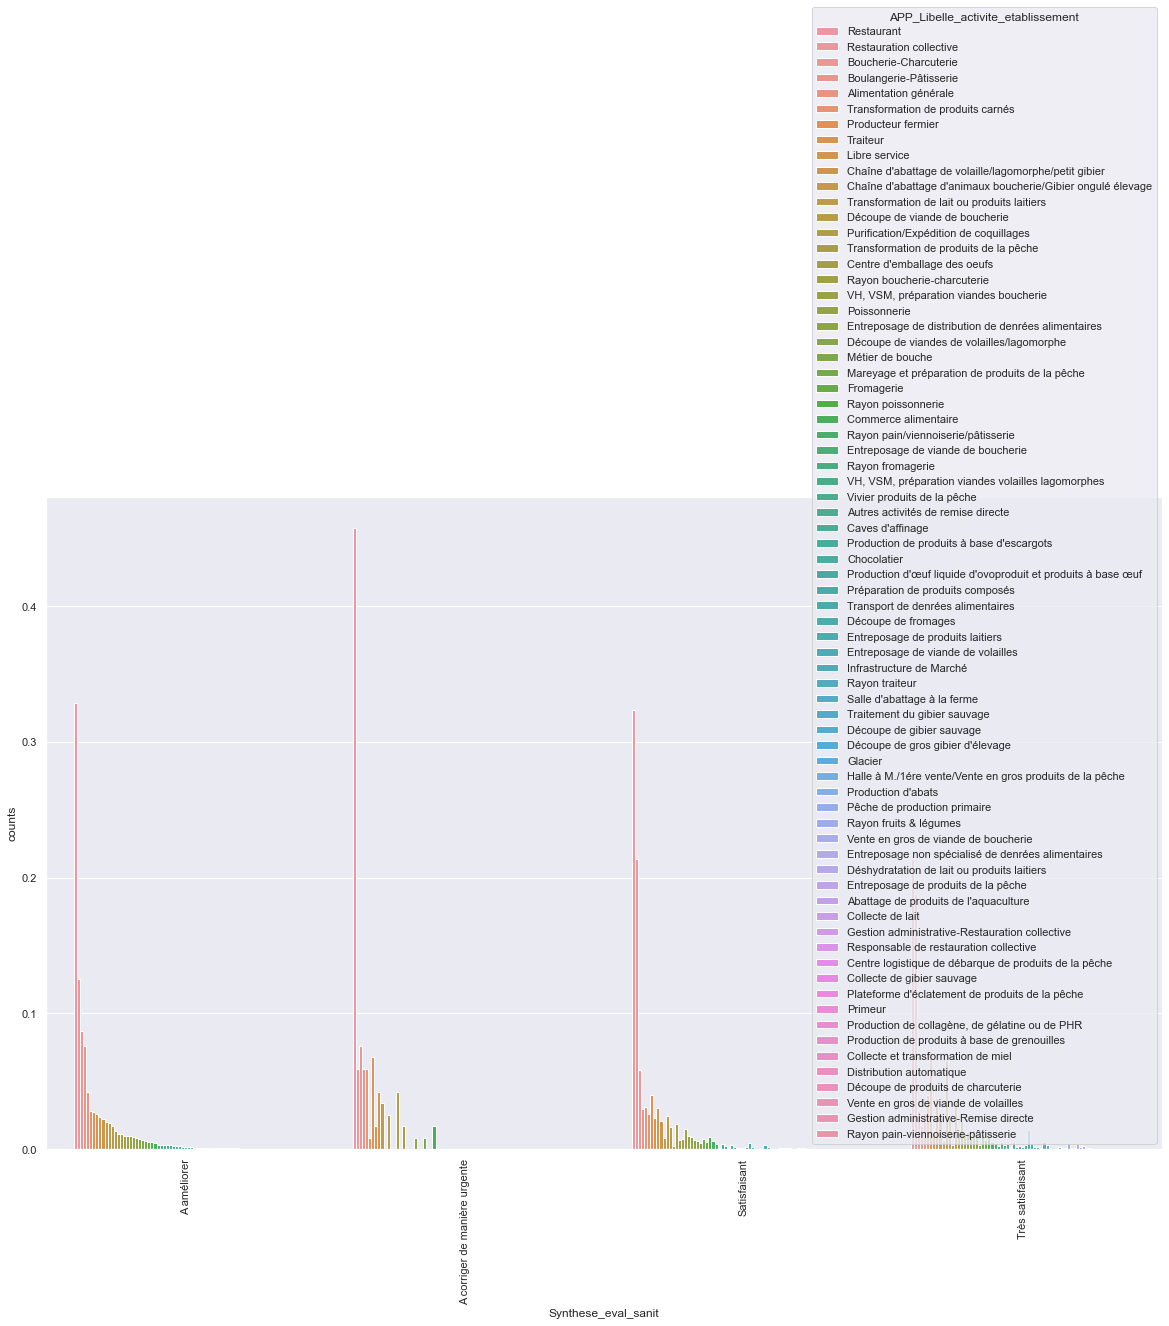

In [36]:
plt.figure(figsize=(20,12))
plt.xticks(rotation='vertical')
sns.barplot(data=s_to_df, x="Synthese_eval_sanit", y='counts',hue='APP_Libelle_activite_etablissement')

In [37]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526102
Très satisfaisant                0.422512
A améliorer                      0.048199
A corriger de manière urgente    0.003187
Name: Synthese_eval_sanit, dtype: float64

In [38]:
s_to_df['Synthese_eval_sanit'].value_counts(normalize=True)

Très satisfaisant                0.338095
Satisfaisant                     0.328571
A améliorer                      0.257143
A corriger de manière urgente    0.076190
Name: Synthese_eval_sanit, dtype: float64

In [39]:
# relation entreprise/activités et notes

## Relation Target / Variables
### Encodage des variables

In [40]:

activities_table = pd.pivot_table(df_explode, values=[ 'APP_Libelle_activite_etablissement'], index=['SIRET'],aggfunc='count')
multi_activities=activities_table[activities_table.APP_Libelle_activite_etablissement == 1]
print(df_explode.shape)
multi_activities


(36997, 13)


,APP_Libelle_activite_etablissement
SIRET,
00705004000018,1
00715030300027,1
00728021700014,1
01645029800019,1
01705065900063,1
...,...
SIRET000028765,1
SIRET000029241,1
SIRET000029247,1


In [41]:
df_explode[df_explode.SIRET == '21130055300016']

,Unnamed: 0,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
1593,1594,MAIRIE COMMUNE DE MARSEILLE,21130055300016,21 BD DE LA SAVINE,13015,Marseille 15e Arrondissement,22-001039-1,2022-01-10 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.367723,5.366527",Autres
15442,15476,MAIRIE COMMUNE DE MARSEILLE,21130055300016,56 Bd. de la Fédération,13004,Marseille 4e Arrondissement,21-083899-1,2021-10-15 02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.312309,5.402973",Autres
15814,15850,MAIRIE COMMUNE DE MARSEILLE,21130055300016,Allée Yvon Morandat,13008,Marseille 8e Arrondissement,21-083151-1,2021-10-13 02:00:00+02:00,Restauration collective,Satisfaisant,NaN,NaN,Autres
15882,15918,MAIRIE COMMUNE DE MARSEILLE,21130055300016,"47, Avenue St Paul",13013,Marseille 13e Arrondissement,21-097416-1,2021-11-30 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.327525,5.40739",Autres
15883,15919,MAIRIE COMMUNE DE MARSEILLE,21130055300016,Crèche REDON,13009,Marseille 9e Arrondissement,21-037759-1,2021-05-11 02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.249547,5.422467",Autres
15933,15970,MAIRIE COMMUNE DE MARSEILLE,21130055300016,5 Rue Paul Converset,13014,Marseille 14e Arrondissement,21-099199-1,2021-12-06 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.347555,5.377398",Autres
16270,16307,MAIRIE COMMUNE DE MARSEILLE,21130055300016,63 Tr. la Valbarelle St Cyr,13010,Marseille 10e Arrondissement,21-019334-1,2021-03-08 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.281316,5.440172",Autres
28659,28739,MAIRIE COMMUNE DE MARSEILLE,21130055300016,22 RUE BERARD,13005,Marseille 5e Arrondissement,22-005188-1,2022-01-24 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.286896,5.393725",Autres
28671,28751,MAIRIE COMMUNE DE MARSEILLE,21130055300016,5 RUE JOBIN,13003,Marseille 3e Arrondissement,22-003378-1,2022-01-20 01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.310635,5.389143",Autres
28735,28815,MAIRIE COMMUNE DE MARSEILLE,21130055300016,194 RUE CHARLES KADDOUZ,13012,Marseille 12e Arrondissement,21-026915-1,2021-04-01 02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.316674,5.436379",Autres


In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[["Très satisfaisant","Satisfaisant","A améliorer","A corriger de manière urgente"]])
Label_synthese=[["Très satisfaisant"],["Satisfaisant"],["A améliorer"],["A corriger de manière urgente"]]
# entraîner le modèle selon l'ordre établi dans categories
enc.fit(Label_synthese)

# observer si le classement est respecté
print("classement :\n", enc.transform(Label_synthese))

# tester avec un autre échantillon
print("échantillon :\n", enc.transform( [["Très satisfaisant"], ["A corriger de manière urgente"]] ))

# faire de même avec les valeurs numériques
print("inverse :\n", enc.inverse_transform([[3], [0]]))

classement :
 [[0.]
 [1.]
 [2.]
 [3.]]
échantillon :
 [[0.]
 [3.]]
inverse :
 [['A corriger de manière urgente']
 ['Très satisfaisant']]


In [43]:
enc = OrdinalEncoder(categories=[["Très satisfaisant","Satisfaisant","A améliorer","A corriger de manière urgente"]])

df_explode['synthese_eval_encode'] = enc.fit_transform(df_explode.loc[:,['Synthese_eval_sanit']])
df_explode[['Synthese_eval_sanit', 'synthese_eval_encode']]

,Synthese_eval_sanit,synthese_eval_encode
0,Satisfaisant,1.0
1,Très satisfaisant,0.0
2,Très satisfaisant,0.0
3,Satisfaisant,1.0
4,Satisfaisant,1.0
...,...,...
35452,Satisfaisant,1.0
35453,Satisfaisant,1.0
35454,Satisfaisant,1.0
35455,Satisfaisant,1.0


In [44]:
df_matrice = df_explode.copy()
list_of_column = ['APP_Libelle_etablissement', 'Adresse_2_UA', 'Libelle_commune', 'geores']
df_matrice = df_matrice.drop(list_of_column, axis=1)

In [45]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

df_matrice['Date_inspection'] = pd.to_datetime(df_matrice['Date_inspection'], utc=True)
df_matrice['month'] = df_matrice.Date_inspection.dt.month
df_matrice = encode(df_matrice, 'month', 12)

df_matrice['day'] = df_matrice.Date_inspection.dt.month
df_matrice = encode(df_matrice, 'day', 365)
df_matrice

,Unnamed: 0,SIRET,Code_postal,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,ods_type_activite,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos
0,0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667
1,1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,Restaurant,Très satisfaisant,NaN,Autres,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126
2,2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,Alimentation générale,Très satisfaisant,NaN,Autres,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407
3,3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,_,Satisfaisant,NaN,Autres,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407
4,4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35452,35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,Restauration collective,Satisfaisant,44079001,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671
35453,35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,Restauration collective,Satisfaisant,78517061,Autres,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220
35454,35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,Restaurant,Satisfaisant,NaN,Autres,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749
35455,35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,Restauration collective,Satisfaisant,NaN,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671


In [46]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# solution 1 - Label Encoding
df_matrice["APP_Libelle_activite_etablissement"] = df_matrice["APP_Libelle_activite_etablissement"].astype('category')
df_matrice["activite_category"] = df_matrice["APP_Libelle_activite_etablissement"].cat.codes
df_matrice

# solution 2 - One Hot Encoding
# df_matrice = pd.get_dummies(df_explode, columns=["APP_Libelle_activite_etablissement"]).iloc[:, 12:]
# df_matrice


,Unnamed: 0,SIRET,Code_postal,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,ods_type_activite,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category
0,0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1
1,1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,Restaurant,Très satisfaisant,NaN,Autres,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58
2,2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,Alimentation générale,Très satisfaisant,NaN,Autres,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1
3,3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,_,Satisfaisant,NaN,Autres,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72
4,4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35452,35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,Restauration collective,Satisfaisant,44079001,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59
35453,35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,Restauration collective,Satisfaisant,78517061,Autres,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59
35454,35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,Restaurant,Satisfaisant,NaN,Autres,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58
35455,35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,Restauration collective,Satisfaisant,NaN,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59


In [47]:
df_matrice['Agrement'] = df_matrice['Agrement'].where(df_matrice['Agrement'].isnull(), 1).fillna(0).astype(int)
df_matrice = df_matrice[df_matrice['Code_postal'].isna() == False]
df_matrice = df_matrice.drop(['APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'ods_type_activite'], axis=1)
df_matrice['Code_postal'] = df_matrice['Code_postal'].astype(int)

df_matrice

,Unnamed: 0,SIRET,Code_postal,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category
0,0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1
1,1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58
2,2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1
3,3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72
4,4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35452,35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,1,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59
35453,35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,1,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59
35454,35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,0,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58
35455,35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,0,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59


In [48]:
df_matrice['departement'] = df_matrice['Code_postal'].astype(str).str[:2].astype(int)
df_matrice

,Unnamed: 0,SIRET,Code_postal,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category,departement
0,0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1,92
1,1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58,69
2,2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1,92
3,3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72,78
4,4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35452,35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,1,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59,44
35453,35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,1,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59,78
35454,35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,0,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58,71
35455,35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,0,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59,78


In [49]:
df_matrice.to_csv('matrice.csv', index=False)

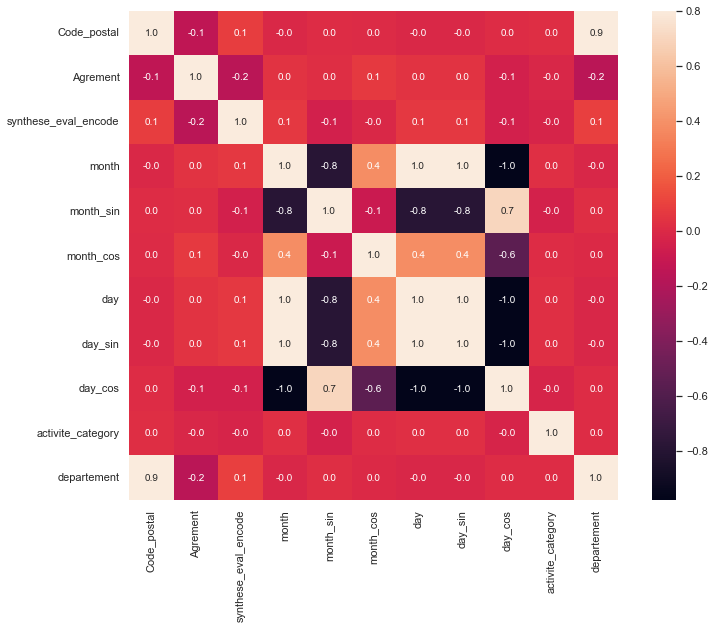

In [50]:
# Correlation matrix
corrmat = df_matrice.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True, annot=True, fmt='.1f', annot_kws={'size': 10});
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a1379aa-ea9c-402c-95ca-194460431a68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>